In [1]:
#import the modules
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import Recommenders as Recommenders
import Evaluation as Evaluation

In [2]:
#Load the Pima Diabeties dataset
data = pd.read_csv('ratings_Electronics.csv',names = ['userId','productId','ratings','timestamp'])

# Explore the data

In [3]:
data.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
data.drop(['timestamp'],axis=1,inplace = True)

In [5]:
data.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [6]:
data.shape

(7824482, 3)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [8]:
data.describe()

,ratings
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [9]:
#Check For null values in the dataset
data.isnull().sum()

userId       0
productId    0
ratings      0
dtype: int64

In [10]:
data.userId=data.userId.astype(str)
data.productId=data.productId.astype(str)

In [11]:
data.groupby(["ratings"]).count()

,userId,productId
ratings,,
1.0,901765,901765
2.0,456322,456322
3.0,633073,633073
4.0,1485781,1485781
5.0,4347541,4347541


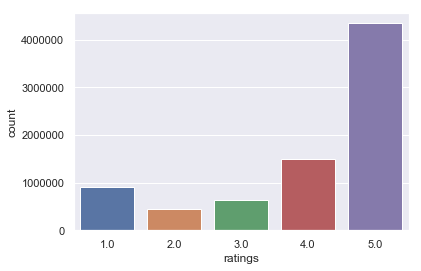

In [12]:
sns.countplot(data['ratings'])

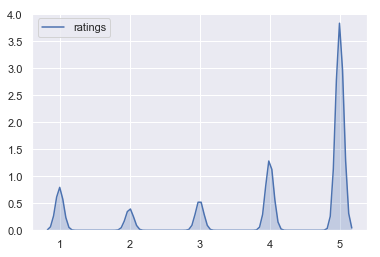

In [13]:
sns.kdeplot(data['ratings'], shade=True, shade_lowest=False)

In [15]:
# the most popular products in the dataset
product_grouped = data.groupby(['productId']).agg({'ratings': 'count'}).reset_index()
grouped_sum = product_grouped['ratings'].sum()
print(grouped_sum)
product_grouped['percentage']  = product_grouped['ratings'].div(grouped_sum)*100
product_grouped.sort_values(['ratings', 'productId'], ascending = [0,1])

7824482


,productId,ratings,percentage
308398,B0074BW614,18244,0.233166
429572,B00DR0PDNE,16454,0.210289
327308,B007WTAJTO,14172,0.181124
102804,B0019EHU8G,12285,0.157007
296625,B006GWO5WK,12226,0.156253
178601,B003ELYQGG,11617,0.148470
178813,B003ES5ZUU,10276,0.131331
323013,B007R5YDYA,9907,0.126615
289775,B00622AG6S,9823,0.125542
30276,B0002L5R78,9487,0.121248


In [16]:
# Count number of unique users in the dataset
users = data['userId'].unique()
len(users)

4201696

In [17]:
# Count the number of unique movies in the dataset
products = data['productId'].unique()
len(products)

476002

In [18]:
# Users with max no of products rated
data["userId"].value_counts().head()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: userId, dtype: int64

# subset of the dataset

In [19]:
# Create a subset of the dataset
# keep the users only who has given 50 or more number of ratings
user_grouped = data.groupby('userId').agg({'ratings': 'count'})
index_users_rated_above_50 = user_grouped[user_grouped.ratings >= 50].index
sub_set = data[data['userId'].isin(index_users_rated_above_50)]

In [20]:
sub_set

,userId,productId,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
631,A3TAS1AG6FMBQW,0972683275,5.0
1003,A2Y4H3PXB07WQI,0972683275,4.0
1138,A25RTRAPQAJBDJ,0972683275,5.0
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0


In [21]:
train_data, test_data = train_test_split(sub_set, test_size = 0.30, random_state=0)
train_data.head()

,userId,productId,ratings
6595853,A2BYV7S1QP2YIG,B009EAHVTA,5.0
4738241,AB094YABX21WQ,B0056XCEAA,1.0
4175596,A3D0UM4ZD2CMAW,B004I763AW,5.0
3753016,AATWFX0ZZSE6C,B0040NPHMO,3.0
1734767,A1NNMOD9H36Q8E,B0015VW3BM,4.0


# Popularity Recommender model.

In [22]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'userId', 'productId')

In [23]:
user_id = users[20]
pm.recommend(user_id)

,userId,productId,score,Rank
30847,A37K02NKUIT68K,B0088CJT4U,133,1.0
30287,A37K02NKUIT68K,B007WTAJTO,124,2.0
19647,A37K02NKUIT68K,B003ES5ZUU,122,3.0
8752,A37K02NKUIT68K,B000N99BBC,114,4.0
30555,A37K02NKUIT68K,B00829THK0,97,5.0
30559,A37K02NKUIT68K,B00829TIEK,97,6.0
17384,A37K02NKUIT68K,B002R5AM7C,94,7.0
31107,A37K02NKUIT68K,B008DWCRQW,91,8.0
17573,A37K02NKUIT68K,B002SZEOLG,84,9.0
22744,A37K02NKUIT68K,B004CLYEDC,82,10.0


In [24]:
user_id = users[7]
pm.recommend(user_id)

,userId,productId,score,Rank
30847,A2TY0BTJOTENPG,B0088CJT4U,133,1.0
30287,A2TY0BTJOTENPG,B007WTAJTO,124,2.0
19647,A2TY0BTJOTENPG,B003ES5ZUU,122,3.0
8752,A2TY0BTJOTENPG,B000N99BBC,114,4.0
30555,A2TY0BTJOTENPG,B00829THK0,97,5.0
30559,A2TY0BTJOTENPG,B00829TIEK,97,6.0
17384,A2TY0BTJOTENPG,B002R5AM7C,94,7.0
31107,A2TY0BTJOTENPG,B008DWCRQW,91,8.0
17573,A2TY0BTJOTENPG,B002SZEOLG,84,9.0
22744,A2TY0BTJOTENPG,B004CLYEDC,82,10.0


In [26]:
###Fill in the code here
user_id = 'A3A4ZAIBQWKOZS'
pm.recommend(user_id)

,userId,productId,score,Rank
30847,A3A4ZAIBQWKOZS,B0088CJT4U,133,1.0
30287,A3A4ZAIBQWKOZS,B007WTAJTO,124,2.0
19647,A3A4ZAIBQWKOZS,B003ES5ZUU,122,3.0
8752,A3A4ZAIBQWKOZS,B000N99BBC,114,4.0
30555,A3A4ZAIBQWKOZS,B00829THK0,97,5.0
30559,A3A4ZAIBQWKOZS,B00829TIEK,97,6.0
17384,A3A4ZAIBQWKOZS,B002R5AM7C,94,7.0
31107,A3A4ZAIBQWKOZS,B008DWCRQW,91,8.0
17573,A3A4ZAIBQWKOZS,B002SZEOLG,84,9.0
22744,A3A4ZAIBQWKOZS,B004CLYEDC,82,10.0


# Collaborative Filtering model

In [25]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

In [26]:
sub_data = Dataset.load_from_df(sub_set[['userId', 'productId', 'ratings']], reader)

In [28]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(sub_data, test_size=.30,random_state=123)

In [29]:
# user item rating data can be obtained as follows
user_records = trainset.ur
type(user_records)

collections.defaultdict

In [30]:
for keys in user_records.keys():
    print(keys)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [31]:
user_records[0]

[(0, 5.0),
 (584, 5.0),
 (1913, 5.0),
 (3981, 4.0),
 (4397, 5.0),
 (129, 5.0),
 (211, 5.0),
 (6720, 5.0),
 (1216, 3.0),
 (1511, 4.0),
 (3729, 5.0),
 (11294, 4.0),
 (5122, 5.0),
 (11981, 5.0),
 (11669, 5.0),
 (13206, 5.0),
 (1642, 3.0),
 (2002, 5.0),
 (11033, 5.0),
 (336, 4.0),
 (15577, 5.0),
 (16190, 1.0),
 (4482, 4.0),
 (766, 5.0),
 (16700, 5.0),
 (17902, 5.0),
 (623, 5.0),
 (3058, 3.0),
 (7104, 5.0),
 (19538, 4.0),
 (1209, 4.0),
 (926, 5.0),
 (6246, 5.0),
 (21078, 4.0),
 (21990, 5.0),
 (22708, 3.0),
 (7687, 4.0),
 (23749, 5.0),
 (1120, 5.0),
 (319, 5.0),
 (4478, 5.0),
 (28009, 3.0),
 (28160, 4.0),
 (7236, 4.0),
 (28479, 5.0),
 (602, 5.0),
 (28789, 5.0),
 (14440, 5.0),
 (30192, 5.0),
 (136, 4.0),
 (248, 5.0),
 (5748, 5.0),
 (25764, 3.0),
 (16566, 5.0),
 (662, 5.0),
 (11409, 3.0),
 (281, 5.0),
 (4113, 5.0),
 (5172, 5.0),
 (3096, 5.0),
 (24734, 4.0),
 (13437, 3.0),
 (14453, 5.0),
 (9965, 5.0),
 (6128, 5.0),
 (8874, 5.0),
 (12362, 5.0),
 (37009, 4.0),
 (29996, 5.0),
 (37847, 4.0),
 (3810

In [32]:
# However the ids are the inner ids and not the raw ids
# raw ids can be obatined as follows

print(trainset.to_raw_uid(0))
print(trainset.to_raw_iid(1066))

AAQ9NJ480N9W5
B00008VF8R


In [38]:
from surprise import KNNWithMeans
from surprise import SVD
from surprise import accuracy

In [39]:
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(trainset)

In [40]:
test_pred = svd_model.test(testset)

In [41]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 2.0294


2.0293869567462037

# Generating top 5 recommendations

In [42]:
testset_new = trainset.build_anti_testset()

In [43]:
len(testset_new)

58722951

In [44]:
testset_new[0:5]

[('AAQ9NJ480N9W5', 'B004UL34EY', 4.265092101828417),
 ('AAQ9NJ480N9W5', 'B00005105N', 4.265092101828417),
 ('AAQ9NJ480N9W5', 'B000EGQS5G', 4.265092101828417),
 ('AAQ9NJ480N9W5', 'B0012XAUS6', 4.265092101828417),
 ('AAQ9NJ480N9W5', 'B000AP05BO', 4.265092101828417)]